<a href="https://colab.research.google.com/github/Rabikhais123/SVM/blob/main/SpamDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
df_test=pd.read_csv('/content/drive/MyDrive/Pandas dataset/SMS_test.csv',encoding='ISO-8859-1')
df_train=pd.read_csv('/content/drive/MyDrive/Pandas dataset/SMS_train.csv',encoding='ISO-8859-1')
df_test

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [29]:
df_train

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam
953,954,How much you got for cleaning,Non-Spam
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,956,Wat time ü finish?,Non-Spam


In [30]:
df=pd.concat([df_train,df_test],ignore_index=True)
df

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
1077,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,122,Try to do something dear. You read something f...,Non-Spam
1079,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [31]:
df.drop(['S. No.'],inplace=True,axis=1)
df

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,Try to do something dear. You read something f...,Non-Spam
1079,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [32]:
df

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,Try to do something dear. You read something f...,Non-Spam
1079,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [33]:
df['Label'].value_counts()

Non-Spam    884
Spam        198
Name: Label, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

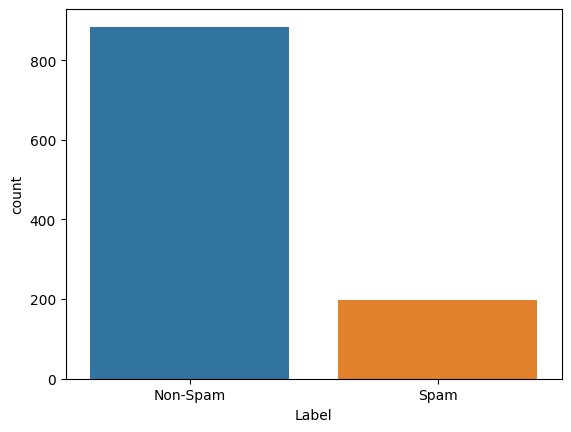

In [34]:
import seaborn as sns
sns.countplot(x=df['Label'])

In [35]:
df['Label']=df['Label'].map({'Spam':1,'Non-Spam':0})

In [36]:
msg=df.Message_body
msg

0                              Rofl. Its true to its name
1       The guy did some bitching but I acted like i'd...
2       Pity, * was in mood for that. So...any other s...
3                    Will ü b going to esplanade fr home?
4       This is the 2nd time we have tried 2 contact u...
                              ...                        
1077    7 wonders in My WORLD 7th You 6th Ur style 5th...
1078    Try to do something dear. You read something f...
1079    Sun ah... Thk mayb can if dun have anythin on....
1080    SYMPTOMS when U are in love: "1.U like listeni...
1081    Great. Have a safe trip. Dont panic surrender ...
Name: Message_body, Length: 1082, dtype: object

In [37]:
msg=msg.str.replace('[^a-zA-Z0-9]+',' ')

<ipython-input-37-43a91d22a744>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  msg=msg.str.replace('[^a-zA-Z0-9]+',' ')


In [38]:
import nltk
from nltk.stem import SnowballStemmer
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
stemmer=SnowballStemmer('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [39]:
msg=msg.apply(lambda x:[stemmer.stem(i.lower()) for i in word_tokenize(x)]).apply(lambda y:' '.join(y)) 
msg

0                                 rofl it true to it name
1       the guy did some bitch but i act like i d be i...
2          piti was in mood for that so ani other suggest
3                           will b go to esplanad fr home
4       this is the 2nd time we have tri 2 contact u u...
                              ...                        
1077    7 wonder in my world 7th you 6th ur style 5th ...
1078       tri to do someth dear you read someth for exam
1079    sun ah thk mayb can if dun have anythin on thk...
1080    symptom when u are in love 1 u like listen son...
1081        great have a safe trip dont panic surrend all
Name: Message_body, Length: 1082, dtype: object

In [40]:
from nltk.corpus import stopwords
nltk.download('stopwords')
sw=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
msg=msg.apply(lambda x:[i for i in word_tokenize(x) if i not in sw and len(i)>3]).apply(lambda y:' '.join(y))
msg

0                                          rofl true name
1          bitch like interest someth next week gave free
2                                       piti mood suggest
3                                           esplanad home
4       time contact pound prize claim easi call 08718...
                              ...                        
1077    wonder world style smile person natur love fri...
1078                         someth dear read someth exam
1079               mayb anythin book lesson pilat orchard
1080    symptom love like listen song stop name belov ...
1081                   great safe trip dont panic surrend
Name: Message_body, Length: 1082, dtype: object

In [42]:
X=train_data
y=df['Label'].values

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
idf=TfidfVectorizer()
train_data=idf.fit_transform(msg)
train_data

<1082x2398 sparse matrix of type '<class 'numpy.float64'>'
	with 7002 stored elements in Compressed Sparse Row format>

In [44]:
train_data.shape

(1082, 2398)

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [46]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,y_train)
y_pred=sv.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [47]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
print(accuracy_score(y_test,y_pred)*100)

89.53846153846153


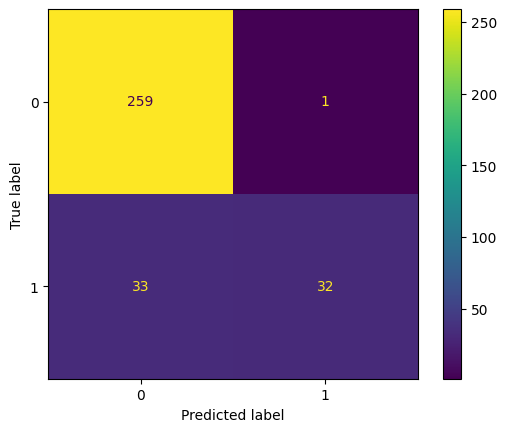

In [48]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [51]:
s='REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode'
y_new=sv.predict(idf.transform([s]))
y_new
if y_new==1:
  print('SPAM')
else:
  print('NON-SPAM')

SPAM
